In [1]:
import pandas as pd
from sklearn.datasets import load_boston

data=load_boston()
df_boston=pd.DataFrame(data['data'],columns=data['feature_names'])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [3]:
import numpy as np
arr=np.array([20,3,7,1,34])
print('Array is',arr)

print('50th percentile of arr',np.percentile(arr,50))
print('25th percentile of arr',np.percentile(arr,25))
print('75th percentile of arr',np.percentile(arr,75))

Array is [20  3  7  1 34]
50th percentile of arr 7.0
25th percentile of arr 3.0
75th percentile of arr 20.0


In [4]:
print(np.percentile(df_boston['AGE'],np.arange(0,100,25)))

[ 2.9   45.025 77.5   94.075]


In [5]:
np.percentile(df_boston['AGE'],25)

45.025

In [6]:
np.percentile(df_boston['AGE'],50)

77.5

In [7]:
np.percentile(df_boston['AGE'],75)

94.07499999999999

{'boxes': [<matplotlib.lines.Line2D at 0x7f79e88bdda0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f79e88527b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f79e885e278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f79e8852eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f79e88520f0>,
  <matplotlib.lines.Line2D at 0x7f79e8852438>]}

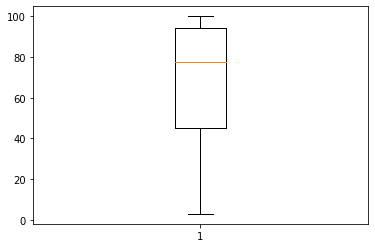

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(df_boston['AGE'])

In [9]:
print('95th percentile of arr',np.percentile(df_boston['AGE'],95))
print('99th percentile of arr',np.percentile(df_boston['AGE'],99))

95th percentile of arr 100.0
99th percentile of arr 100.0


In [10]:
d1={'pid':[101,201,301],'pcname':['hp','dell','sony'],'pprice':[5000,8000,10000]}
d2={'pid':[101,401,201],'pcolor':['silver','white','grey'],'pquan':[3,2,5]}
df_data1=pd.DataFrame(d1)
df_data2=pd.DataFrame(d2)
print('---DataFrame1 is --\n',df_data1)
print('---DataFrame2 is --\n',df_data2)

---DataFrame1 is --
    pid pcname  pprice
0  101     hp    5000
1  201   dell    8000
2  301   sony   10000
---DataFrame2 is --
    pid  pcolor  pquan
0  101  silver      3
1  401   white      2
2  201    grey      5


In [11]:
#inner merge() intersection of basis of given column
df_details=pd.merge(df_data1,df_data2,how='inner',on=['pid'])
print('Inner merge')
print(df_details)

Inner merge
   pid pcname  pprice  pcolor  pquan
0  101     hp    5000  silver      3
1  201   dell    8000    grey      5


In [12]:
#outer merge--> union 
df_allproducts=pd.merge(df_data1,df_data2,how='outer',on=['pid'])
print('---all products info---')
df_allproducts

---all products info---


,pid,pcname,pprice,pcolor,pquan
0,101,hp,5000.0,silver,3.0
1,201,dell,8000.0,grey,5.0
2,301,sony,10000.0,NaN,NaN
3,401,NaN,NaN,white,2.0


In [13]:
# left merge -- merge the data of right side  on basis of left side dataframe
df_ldetails=pd.merge(df_data1,df_data2,how='left',on=['pid'])
df_ldetails

,pid,pcname,pprice,pcolor,pquan
0,101,hp,5000,silver,3.0
1,201,dell,8000,grey,5.0
2,301,sony,10000,NaN,NaN


In [14]:
df_rdetails=pd.merge(df_data1,df_data2,how='right',on=['pid'])
df_rdetails

,pid,pcname,pprice,pcolor,pquan
0,101,hp,5000.0,silver,3
1,401,NaN,NaN,white,2
2,201,dell,8000.0,grey,5


In [15]:
df_rdetails.fillna(method='ffill')

,pid,pcname,pprice,pcolor,pquan
0,101,hp,5000.0,silver,3
1,401,hp,5000.0,white,2
2,201,dell,8000.0,grey,5


In [16]:
df_rdetails.fillna(method='bfill')

,pid,pcname,pprice,pcolor,pquan
0,101,hp,5000.0,silver,3
1,401,dell,8000.0,white,2
2,201,dell,8000.0,grey,5


In [17]:
df_rdetails.fillna(value=0)

,pid,pcname,pprice,pcolor,pquan
0,101,hp,5000.0,silver,3
1,401,0,0.0,white,2
2,201,dell,8000.0,grey,5


In [18]:
df_rdetails.fillna(value={'pcname':'No CompanyName','pprice':0.0})

,pid,pcname,pprice,pcolor,pquan
0,101,hp,5000.0,silver,3
1,401,No CompanyName,0.0,white,2
2,201,dell,8000.0,grey,5


In [19]:
df_rdetails.fillna(value={'pcname':'No CompanyName','pprice':df_rdetails['pprice'].mean()})

,pid,pcname,pprice,pcolor,pquan
0,101,hp,5000.0,silver,3
1,401,No CompanyName,6500.0,white,2
2,201,dell,8000.0,grey,5
